In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [3]:
#MODEL

In [4]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [5]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [7]:
ridge_model.coef_f_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

Text(0.5, 1.0, 'Düzenlileştirmenin Bir Fonksiyon Olarak Ridge Katsayıları')

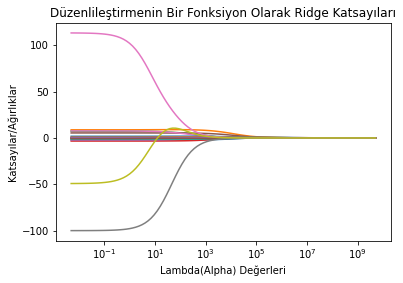

In [9]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)
    
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale('log')

plt.xlabel("Lambda(Alpha) Değerleri")
plt.ylabel("Katsayılar/Ağırlıklar")
plt.title("Düzenlileştirmenin Bir Fonksiyon Olarak Ridge Katsayıları")

In [11]:
#lamda ile bu değişkenleri 0 a yaklaştırma regresyon katsayılar
#seçilecek lamdaya göre değişkenlerin ağırlığını ayarlama 

In [12]:
#TAHMİN

In [14]:
y_pred = ridge_model.predict(X_test)#artık train hatalarını bulmadığımızdan
#ytrainpred ytestpred diye ayırmıyorum

In [15]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.0517922282835

In [16]:
r2_score(y_test, y_pred)

0.4110844905067641

In [17]:
#MODEL TUNİNG (OPTİMUM ALPHA DEĞERİNİ BULMA(LAMBDA))

In [18]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [19]:
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error", 
                   normalize = True)

In [20]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [21]:
#özel bir kütüphane sayesinde optimum alphayı kendisi buldu

In [22]:
ridge_cv.alpha_

0.7599555414764666

In [24]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, normalize = True).fit(X_train, y_train)

In [25]:
ridge_tuned.coef_

array([ 1.44624890e-01,  1.04791010e+00,  1.36872965e+00,  1.20061792e+00,
        7.82870997e-01,  1.55552882e+00,  3.76433192e+00,  1.20382822e-02,
        5.32415433e-02,  2.55307367e-01,  1.08012329e-01,  9.63035626e-02,
        8.68878351e-02,  1.62796122e-01,  3.20045418e-02, -1.01265296e+00,
        2.89891038e+01, -6.76670272e+01,  1.27302535e+01])

In [26]:
y_tuned_pred = ridge_tuned.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test, y_tuned_pred))

386.6826429756415